In [1]:
import matplotlib

import matplotlib.pyplot as plt
import DDFS.analytic_method as am
from DDFS.element import *
from copy import deepcopy
from tqdm.notebook import tqdm
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)

para_p = {
    "type": "steps",
    "maxvalue": 120,
    "minvalue": 2,
    "steps": 100,
    "count": 0
}

para_t = {
    "type": "fixed",
    "value": 0.3
}

para_phi = {
    "type": "even",
    "minvalue": -3.14,
    "maxvalue": 3.14,
}

emit_mode = {
    "p": para_p,
    "theta": para_t,
    "phi": para_phi
}

Detector fast Design & Test package is initialized.



Charge has been changed to -1

Mass has been changed to 0.106


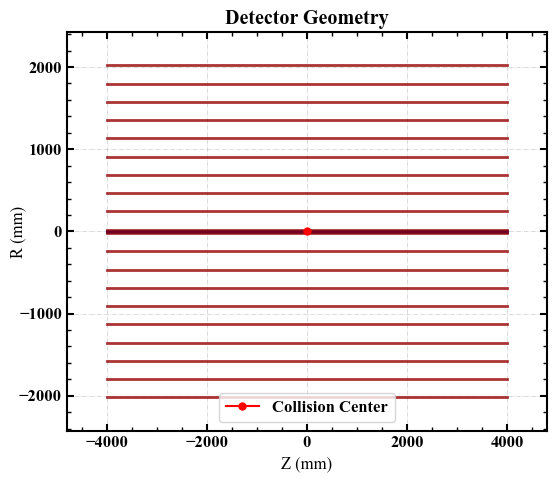

In [2]:
####### 1. Set up the detector, environment, emitter, and particle
d = Detector()
e = Environment()
e.update_environment("B", 3)
e.update_environment("position_resolution", True)
e.update_environment("multiple_scattering", True)
m = Emitter()

p = Particle()
p.update_particle("Charge", -1)
p.update_particle("Mass", 0.106)

m.add_particle(p, 1, deepcopy(emit_mode))
d.add_layer(SiLayer(0.0015, 10, 4000, 0, 9.9, 9.9))
for i in np.linspace(20, 2020, 10):
    d.add_layer(SiLayer(0.002, i, 4000, 1, 0.004, 0.004))

d.visualize_detector()
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

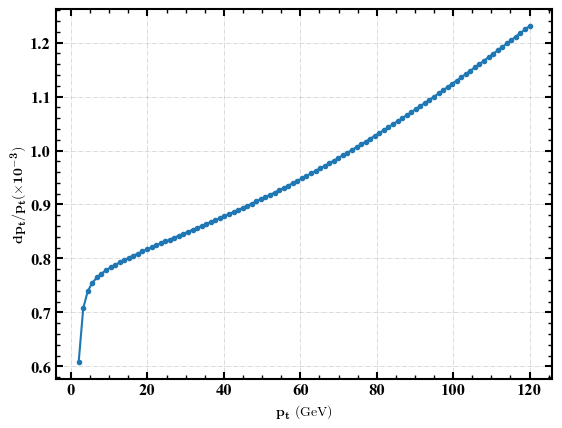

In [3]:
dec_info = d.get_param()
envir_info = e.get_param()




res_a1 = am.Resolution(dec_info, envir_info, m)
N = 100 # test num correspond to the steps in para
re_a1 = Result(N)
re_a1.set_emit_mode(emit_mode)
for i in tqdm(range(N)):
    ini, ret = res_a1.analytic_estimate()
    re_a1.append(ini, ret)

re_a1.analytic_plot('p', 'dp', emit_mode = re_a1.emit_mode)

In [4]:
try:
    os.mkdir("a_test")
except Exception as e:
    print(e)
re_a1.export("a_test", "a_test", "analytic")

[WinError 183] 当文件已存在时，无法创建该文件。: 'a_test'
start storing data to root file
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B                    | double                   | AsDtype('>f8')
p                    | double                   | AsDtype('>f8')
theta                | double                   | AsDtype('>f8')
phi                  | double                   | AsDtype('>f8')
MS                   | double                   | AsDtype('>f8')
RE                   | double                   | AsDtype('>f8')
mass                 | double                   | AsDtype('>f8')
charge               | double                   | AsDtype('>f8')
beam_spot            | double                   | AsDtype('>f8')
dr                   | double                   | AsDtype('>f8')
dz                   | double                   | AsDtype('>f8')
dt                   | double                   |

Please input the test number When create a Result object. or load the data from file.
analytic


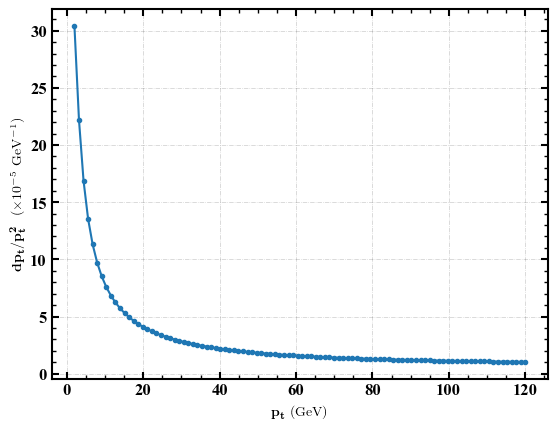

In [5]:
re_load = Result()
re_load.load_root("a_test/a_test.root")

re_load.analytic_plot('p', 'dp2', emit_mode = re_load.emit_mode)